In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\saipr\\Downloads\\mobile_sales.csv")

In [3]:
df

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online
...,...,...,...,...,...,...,...,...,...,...,...
995,41f08915-addb-4966-8628-038c479c619a,2024-01-28,challenge,Brooks Ltd,1386.69,76,28865.70,39,Male,Ronaldchester,Credit Card
996,bcfa1912-5bd8-4894-900f-376fa48f022d,2024-07-13,least,"Lang, Brown and Stone",1159.26,59,50471.42,21,Other,West Jenniferport,Credit Card
997,e6839305-a177-4cda-aada-3ac1f49eeeec,2024-01-13,enjoy,"Atkinson, Moore and Nelson",544.31,59,1381.82,26,Female,Barneschester,Credit Card
998,12f7ac32-9063-4ae5-a122-385b06ba77af,2024-01-25,half,"Kim, Maxwell and Moore",331.98,84,8557.32,20,Male,Jonesborough,Online


In [4]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online


In [5]:
#check null values in dataset
df.isnull().sum()

TransactionID     0
Date              0
MobileModel       0
Brand             0
Price             0
UnitsSold         0
TotalRevenue      0
CustomerAge       0
CustomerGender    0
Location          0
PaymentMethod     0
dtype: int64

<Axes: >

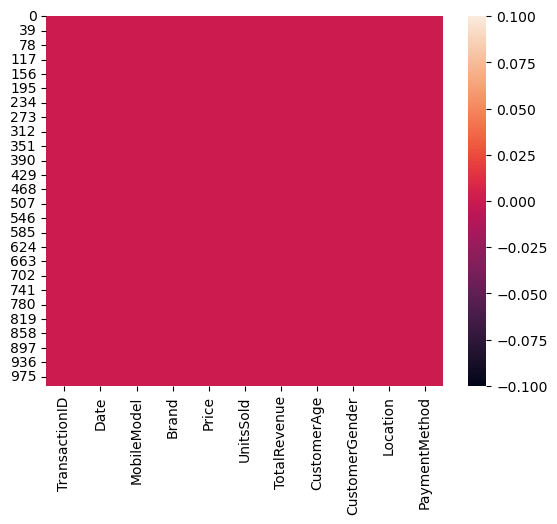

In [6]:
sns.heatmap(df.isnull())

In [7]:
#check duplicates
df.duplicated().sum()

0

In [8]:
#total number of male and femail in dataset
df['CustomerGender'].value_counts()

CustomerGender
Female    341
Other     339
Male      320
Name: count, dtype: int64

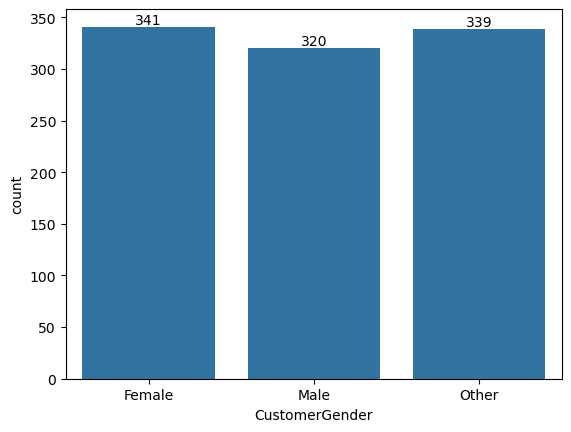

In [9]:
ax=sns.countplot(x='CustomerGender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [10]:
#What is the distribution of units sold across different mobile models?
df.groupby('MobileModel')['UnitsSold'].mean().reset_index()

,MobileModel,UnitsSold
0,Democrat,76.500000
1,PM,95.000000
2,a,50.333333
3,able,4.000000
4,about,31.000000
...,...,...
632,year,68.000000
633,yes,85.000000
634,yet,45.500000
635,you,81.000000


In [11]:
#Calculate the total revenue generated by each brand
df.head(1)
df.groupby('Brand')['TotalRevenue'].sum().reset_index()

,Brand,TotalRevenue
0,Adams Group,15979.32
1,Adams LLC,74497.92
2,Adams-Sanchez,21926.52
3,"Adkins, Robertson and Lindsey",30069.27
4,Aguilar Group,10462.84
...,...,...
975,York Inc,64526.30
976,Young Inc,99642.96
977,"Young, Hill and Morgan",7755.77
978,Yu-Smith,42193.32


In [12]:
# Is there a significant difference in customer age between those who prefer 
# online payment and those who use credit cards?
online_age = df[df['PaymentMethod'] == 'Online']['CustomerAge']
credit_card_age = df[df['PaymentMethod'] == 'Credit Card']['CustomerAge']
age_difference = online_age.mean() - credit_card_age.mean()
print(f"Age Difference between Online and Credit Card Users: {age_difference:.2f}")


Age Difference between Online and Credit Card Users: -0.17


Text(0.5, 1.0, 'Price vs Revenue')

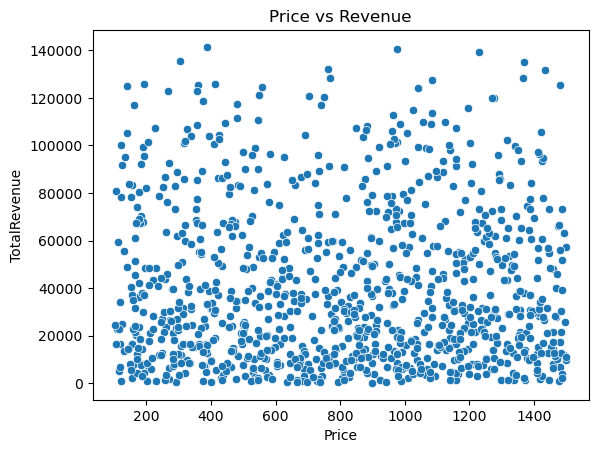

In [13]:
#Use a scatter plot to visualize the relationship between Price and TotalRevenue
df.head()
sns.scatterplot(x='Price',y='TotalRevenue',data=df)
plt.title("Price vs Revenue")

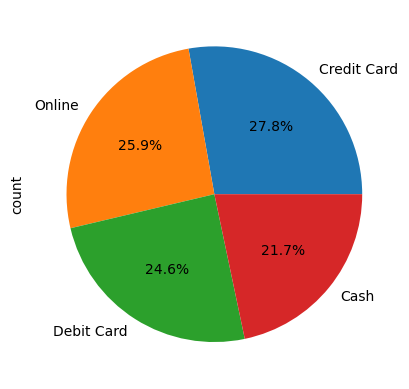

In [14]:
#Create a pie chart to represent the proportion of payment methods used
df1=df['PaymentMethod'].value_counts().plot(kind='pie',autopct='%1.1f%%')


<Axes: xlabel='CustomerAge', ylabel='Count'>

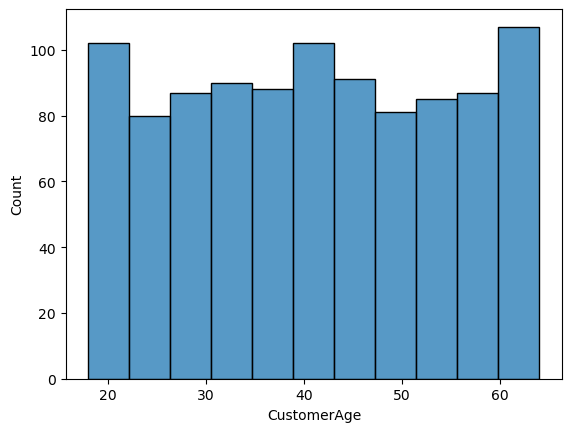

In [20]:
 #Visualize the distribution of customer age.
sns.histplot(x='CustomerAge',data=df,edgecolor='black')

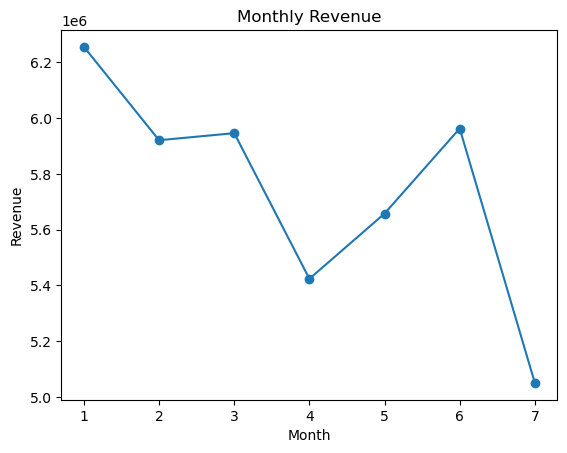

In [37]:
#Analyze sales over time: How did the revenue change by month?
df['Date'] = pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month
df_month_wise=df.groupby('month')['TotalRevenue'].sum()
# Plot the monthly revenue
df_month_wise.plot(kind='line', marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()



In [38]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,month
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,1
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,4
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,2
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,4
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,6


<Axes: xlabel='PaymentMethod', ylabel='TotalRevenue'>

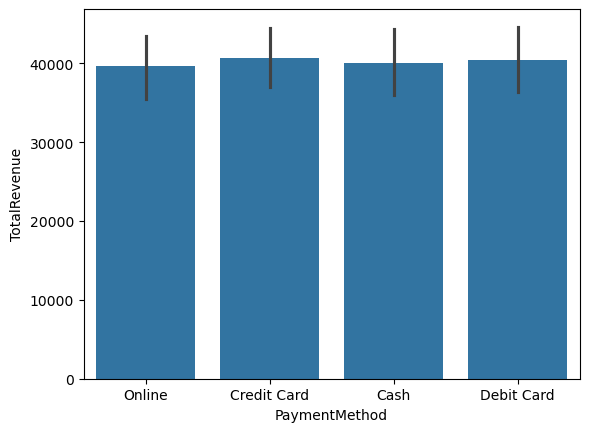

In [39]:
#What is the average revenue per transaction based on payment method?
sns.barplot(x='PaymentMethod',y='TotalRevenue',data=df)

In [42]:
df_payment=df.groupby('PaymentMethod')['TotalRevenue'].mean()
df_payment


PaymentMethod
Cash           40046.622949
Credit Card    40641.170791
Debit Card     40458.853252
Online         39680.326178
Name: TotalRevenue, dtype: float64

In [43]:
# Group by MobileModel and sum the TotalRevenue
highest_revenue_model = df.groupby('MobileModel')['TotalRevenue'].sum().sort_values(ascending=False)
print(highest_revenue_model.head(1))


MobileModel
huge    282863.97
Name: TotalRevenue, dtype: float64


In [48]:
#What is the average number of units sold per transaction for each brand?
df.head()
df_unitwise=df.groupby('Brand')['UnitsSold'].mean().reset_index()
df_unitwise

,Brand,UnitsSold
0,Adams Group,8.0
1,Adams LLC,2.0
2,Adams-Sanchez,85.0
3,"Adkins, Robertson and Lindsey",33.0
4,Aguilar Group,71.0
...,...,...
975,York Inc,34.0
976,Young Inc,93.0
977,"Young, Hill and Morgan",6.0
978,Yu-Smith,25.0


In [50]:
# Is there a correlation between customer age and total revenue?
# Calculate the correlation between CustomerAge and TotalRevenue
correlation = df['CustomerAge'].corr(df['TotalRevenue'])
print(f"Correlation between customer age and total revenue: {correlation:.2f}")


Correlation between customer age and total revenue: 0.10


In [51]:
#How does the payment method affect the number of units sold?
# Group by PaymentMethod and sum the UnitsSold
units_sold_by_payment_method = df.groupby('PaymentMethod')['UnitsSold'].sum()
print(units_sold_by_payment_method)


PaymentMethod
Cash           10657
Credit Card    13826
Debit Card     12648
Online         12943
Name: UnitsSold, dtype: int64


In [52]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,month
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,1
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,4
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,2
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,4
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,6


In [54]:
#corelation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
print(corr_matrix)



                 Price  UnitsSold  TotalRevenue  CustomerAge
Price         1.000000  -0.043042     -0.006248     0.033120
UnitsSold    -0.043042   1.000000      0.042312     0.054354
TotalRevenue -0.006248   0.042312      1.000000     0.095414
CustomerAge   0.033120   0.054354      0.095414     1.000000


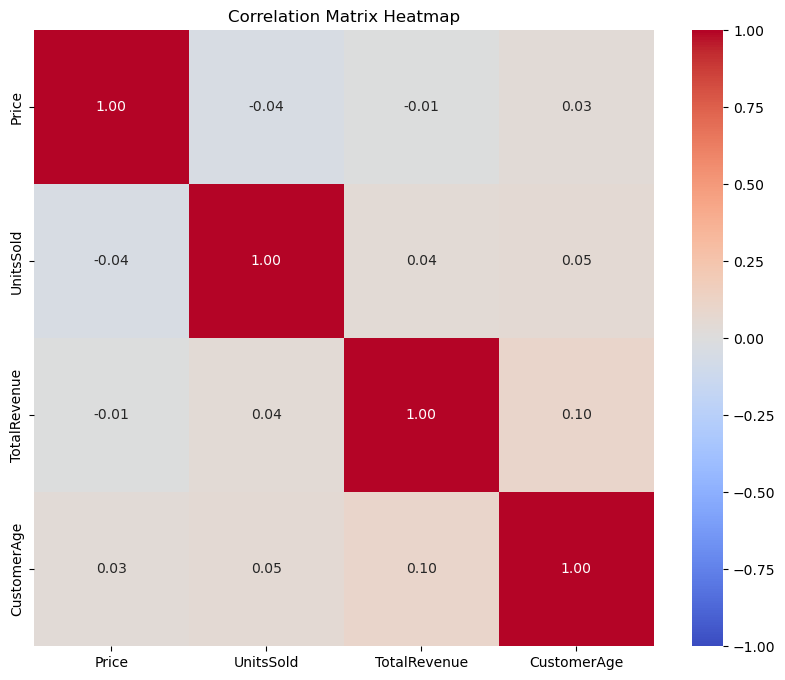

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your own data)
# df = pd.read_csv('your_data.csv')

# Filter out only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()


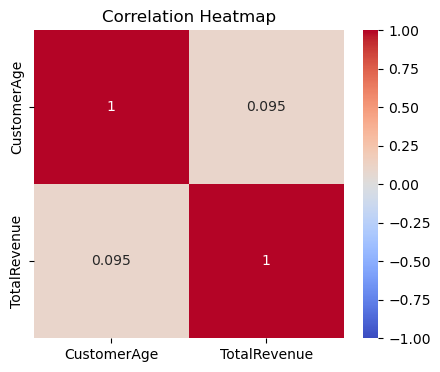

In [58]:



# Calculate the correlation between two specific columns
correlation_matrix = df[['CustomerAge', 'TotalRevenue']].corr()

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()



In [61]:
pd.crosstab(df['PaymentMethod'], df['CustomerGender'])

CustomerGender,Female,Male,Other
PaymentMethod,,,
Cash,80,67,70
Credit Card,93,92,93
Debit Card,85,73,88
Online,83,88,88


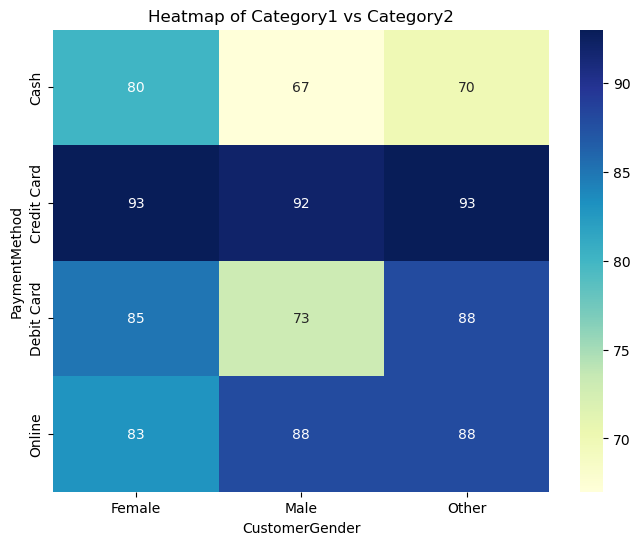

In [60]:
#A contingency table (or cross-tabulation) shows the frequency distribution of the categories for two categorical variables.
contingency_table = pd.crosstab(df['PaymentMethod'], df['CustomerGender'])

# Display the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Category1 vs Category2')
plt.show()


In [59]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,month
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,1
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,4
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,2
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,4
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,6


<Axes: ylabel='TotalRevenue'>

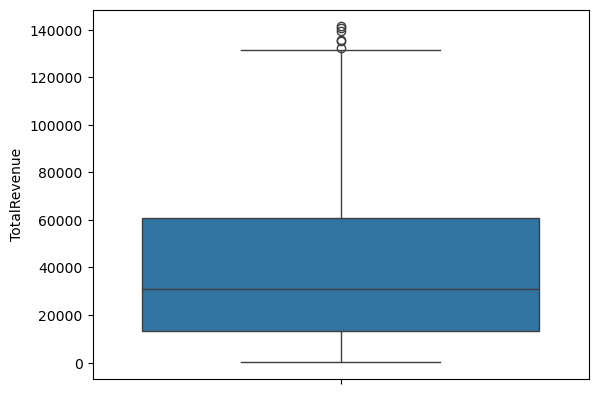

In [62]:
#outliers in TotalRevenue
sns.boxplot(df['TotalRevenue'])

<Axes: ylabel='CustomerAge'>

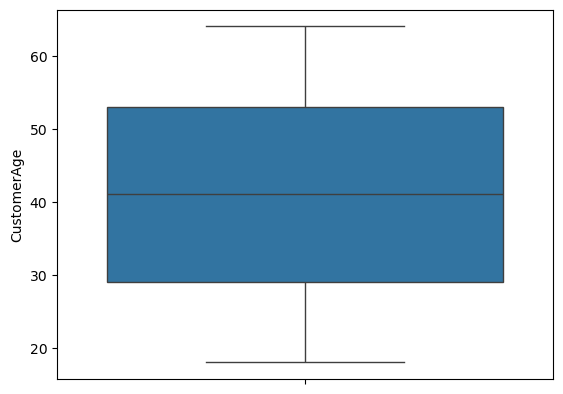

In [63]:
sns.boxplot(df['CustomerAge'])

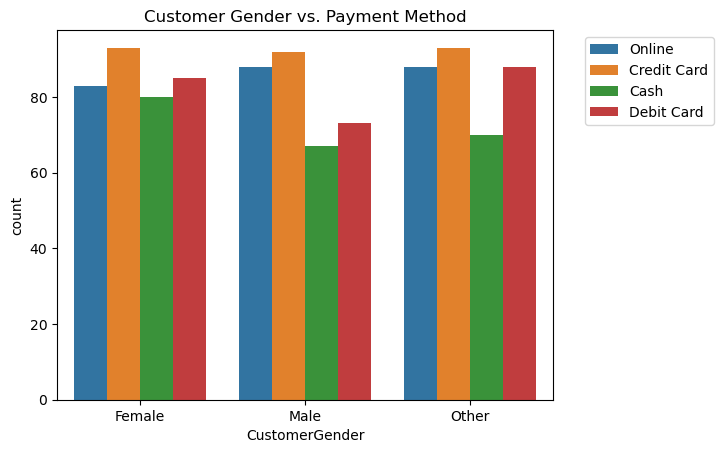

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Count plot of CustomerGender vs. PaymentMethod
sns.countplot(data=df, x='CustomerGender', hue='PaymentMethod')
plt.title('Customer Gender vs. Payment Method')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')# Moves the legend outside


plt.show()


<Figure size 1000x600 with 0 Axes>

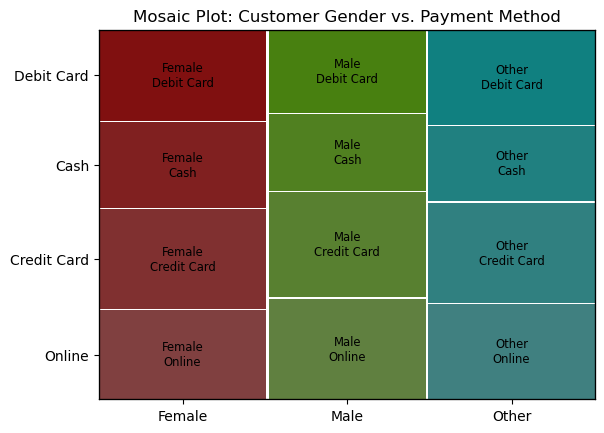

In [67]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# Create a mosaic plot
plt.figure(figsize=(10, 6))
mosaic(df, ['CustomerGender', 'PaymentMethod'])
plt.title('Mosaic Plot: Customer Gender vs. Payment Method')
plt.show()


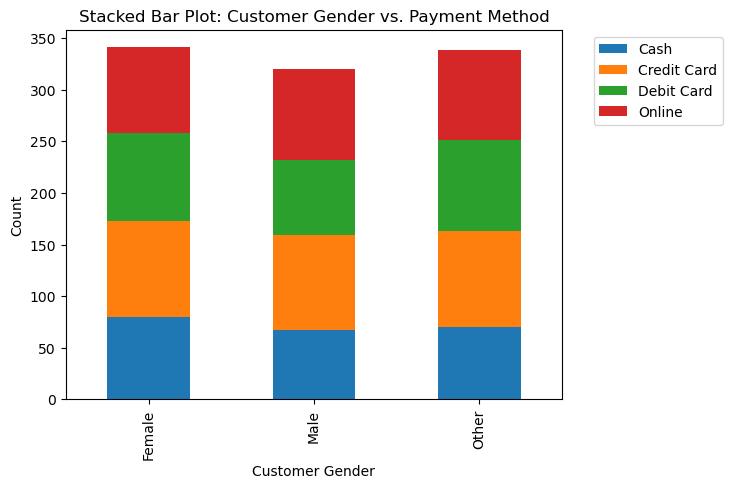

In [69]:
contingency_table = pd.crosstab(df['CustomerGender'], df['PaymentMethod'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Customer Gender vs. Payment Method')
plt.xlabel('Customer Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')# Moves the legend outside

plt.ylabel('Count')
plt.show()


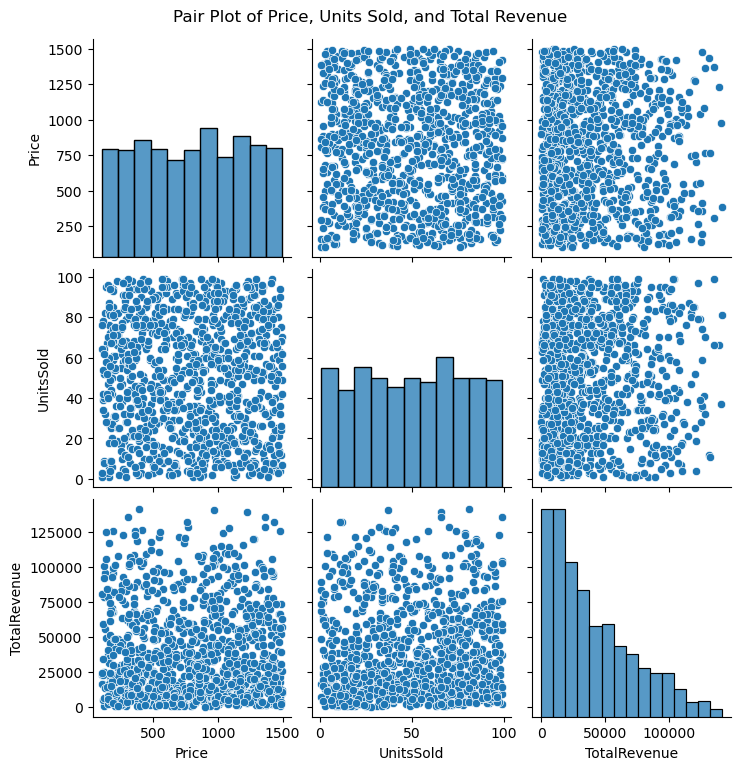

In [70]:
#A pair plot shows scatterplots for every pair of variables and histograms for each variable.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot
sns.pairplot(df[['Price', 'UnitsSold', 'TotalRevenue']])
plt.suptitle('Pair Plot of Price, Units Sold, and Total Revenue', y=1.02)
plt.show()


In [71]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,month
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,1
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,4
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,2
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,4
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,6


<Axes: xlabel='PaymentMethod'>

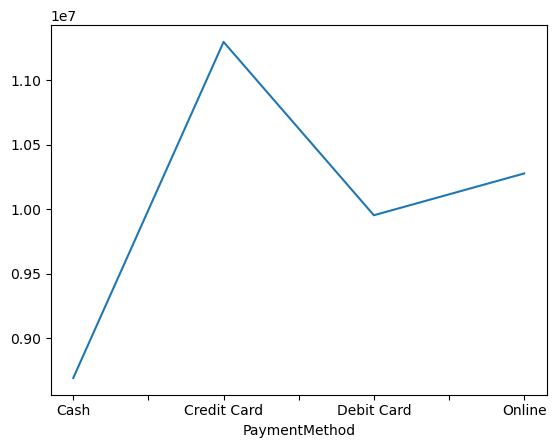

In [74]:
df.groupby('PaymentMethod')['TotalRevenue'].sum().plot()

In [81]:
#Pivot table
df.pivot_table(index='PaymentMethod', columns='CustomerGender', values='TotalRevenue', aggfunc='sum')

CustomerGender,Female,Male,Other
PaymentMethod,,,
Cash,2871450.72,3231788.31,2586878.15
Credit Card,3852197.83,3501400.27,3944647.38
Debit Card,3314193.77,2868318.30,3770365.83
Online,3433165.95,3678210.03,3165828.50


In [79]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,month
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,1
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,4
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,2
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,4
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,6
